In [1]:
from typing import Callable, Sequence, Tuple, Union
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from regression import BaseRegression

In [3]:
class LinearRegression(BaseRegression):
    
    def get_hypothesis(self, theta: np.ndarray) -> Callable[[np.ndarray], float]:
        def h(x: np.ndarray) -> float:
            # Technically x.T does nothing here, and @ computes the inner product of the vectors rather than
            # doing matrix multiplication.
            #print('theta', theta)
            #print('x', x)
            return theta.T @ x.T
        return h

    def cost_function(self, h: Callable[[np.ndarray], float]) -> float:
        cost = 0.0
        for x, y in self.data:
            cost += (h(x) - y)**2
        cost /= (2 * self.m)
        return cost
    
    def delta(self, theta: np.ndarray) -> np.ndarray:
        return (((self.features @ theta) - self.outputs).T @ self.features).T;
    
    def normal_equation(self) -> np.ndarray:
        return np.linalg.inv(self.features.T @ self.features) @ self.features.T @ self.outputs

In [14]:
features = 2 * np.random.rand(10, 1)
outputs = 4 + 3*features + np.random.randn(10, 1)

#features, outputs = ([1], [2], [3], [4], [5]), (3, 7.1, 7.8, 14.1, 18.3)
test1 = LinearRegression(features, outputs, scale_features=True)
theta1, h1, num_steps1 = test1.gradient_descent(a=0.005)
test2 = LinearRegression(features, outputs, scale_features=False)
theta2, h2, num_steps2 = test2.gradient_descent(a=0.005, convergence_threshold = 1e-6)
theta1, theta2, num_steps1, num_steps2

(array([[7.30769338],
        [1.38908658]]),
 array([[4.52671524],
        [2.32138906]]),
 1252,
 4511)

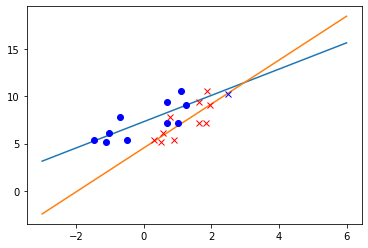

In [15]:
plt.plot([-3, 6], [h1(np.array([1, -3])), h1(np.array([1, 6]))])
plt.plot([-3, 6], [h2(np.array([1, -3])), h2(np.array([1, 6]))])
for x, y in zip(test1.features, outputs):
    plt.plot(x[1], y, 'bo')
for x, y in zip(test2.features, outputs):
    plt.plot(x[1], y, 'rx')

x = 2.5
y1 = test1.get_prediction([x])
y2 = test2.get_prediction([x])
plt.plot(x, y1, 'bx')
#plt.plot(x, y2, 'ro')

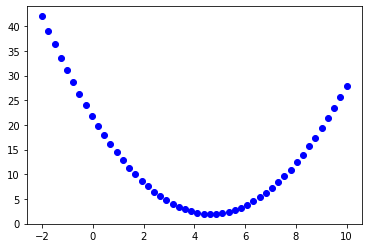

In [16]:
for x in np.linspace(-2, 10):
    h = test2.get_hypothesis(np.array([1, x]))
    plt.plot(x, test2.cost_function(h), 'bo')


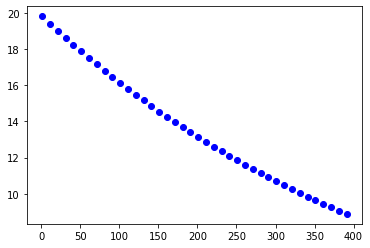

In [7]:
for i in range(1, 400, 10):
    t = LinearRegression(features, outputs, scale_features=False)
    theta, h, num_steps = test1.gradient_descent(a=0.001, iterations=i)
    plt.plot(i, t.cost_function(h), 'bo')

In [8]:
test2.normal_equation()

array([[5.28805435],
       [1.11739102]])

In [9]:
test2.delta(np.array([[0], [0]]))

array([[-61.88386748],
       [-51.89338729]])

In [10]:
test2.features

array([[1.        , 1.11422983],
       [1.        , 1.48793571],
       [1.        , 0.62247261],
       [1.        , 1.28030159],
       [1.        , 0.22548846],
       [1.        , 0.4259621 ],
       [1.        , 0.66947882],
       [1.        , 1.22896923],
       [1.        , 0.24237788],
       [1.        , 0.76023524]])

In [11]:
test2.outputs

array([[5.43120034],
       [7.94558872],
       [5.70608434],
       [7.94929366],
       [5.84046648],
       [4.22277777],
       [6.77481103],
       [5.54536701],
       [7.05854853],
       [5.40972959]])